# Module 03

## Session 10 Time Series Forecasting

# Time Series Model Evaluation

Analyze data opsd_germany_daily.csv
* build a time series model using linear regression
    - target: consumption
    - feature: date
    - FE Date 1: year, month, day, weekday
    - FE date 2: year, month, day, weekday, year 2009, yaer > 2014, chirstmas, winter
* split data
    - training: 2006 - 2015
    - testing: 2016 - end
* compare the result (FE1, FE2) using following evaluation metrics:
    - explained variance
    - mean squared log error
    - r2
    - MAE
    - MSE
    - RMSE
* plot test data, FE data 1 forecasting result, FE data 2 forecasting result


# Library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression

import sklearn.metrics as metrics

# Data

In [2]:
url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv(url, sep=',')

In [3]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [4]:
df[['Date', 'Consumption']].isnull().sum()

Date           0
Consumption    0
dtype: int64

# Fature Engineering 1

##  Date Extraction

FE Date 1: year, month, day, weekday

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['weekday'] = df['Date'].dt.weekday # 0 = monday ... 6 = sunday

In [7]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar,year,month,day,weekday
0,2006-01-01,1069.184,NaN,NaN,NaN,2006,1,1,6
1,2006-01-02,1380.521,NaN,NaN,NaN,2006,1,2,0
2,2006-01-03,1442.533,NaN,NaN,NaN,2006,1,3,1
3,2006-01-04,1457.217,NaN,NaN,NaN,2006,1,4,2
4,2006-01-05,1477.131,NaN,NaN,NaN,2006,1,5,3


## EDA

<AxesSubplot:xlabel='Consumption', ylabel='Count'>

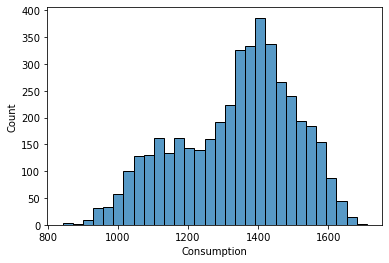

In [8]:
sns.histplot(df['Consumption'])

In [9]:
fig = go.Figure([go.Scatter(name='consumption', x=df['Date'], y=df['Consumption'])])

fig.update_xaxes(rangeslider_visible=True)
fig.show()

<AxesSubplot:xlabel='year', ylabel='Consumption'>

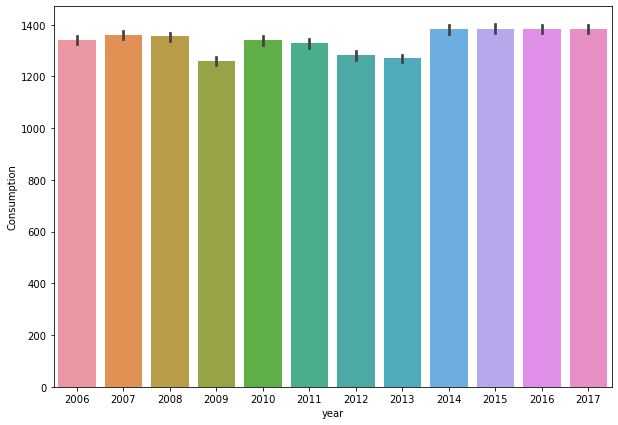

In [10]:
plt.figure(figsize=(10,7))

sns.barplot(x = 'year', y = 'Consumption', data=df)

<AxesSubplot:xlabel='month', ylabel='Consumption'>

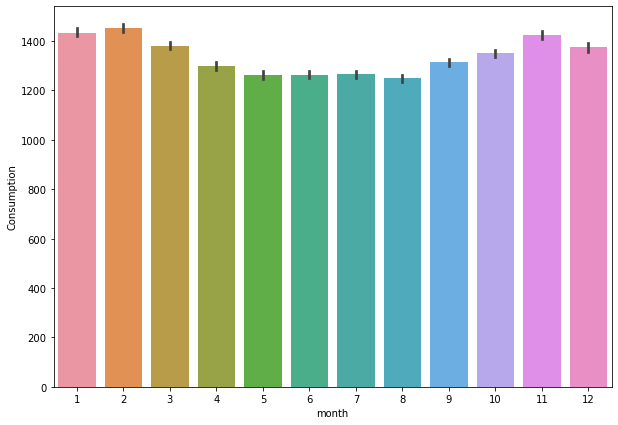

In [11]:
plt.figure(figsize=(10,7))

sns.barplot(x = 'month', y = 'Consumption', data=df)

<AxesSubplot:xlabel='day', ylabel='Consumption'>

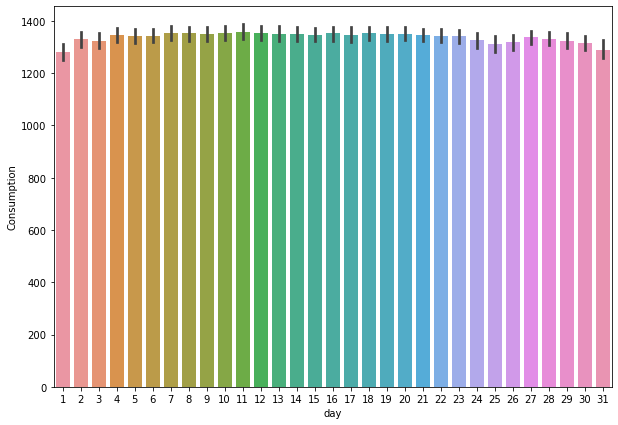

In [12]:
plt.figure(figsize=(10,7))

sns.barplot(x = 'day', y = 'Consumption', data=df)

<AxesSubplot:xlabel='weekday', ylabel='Consumption'>

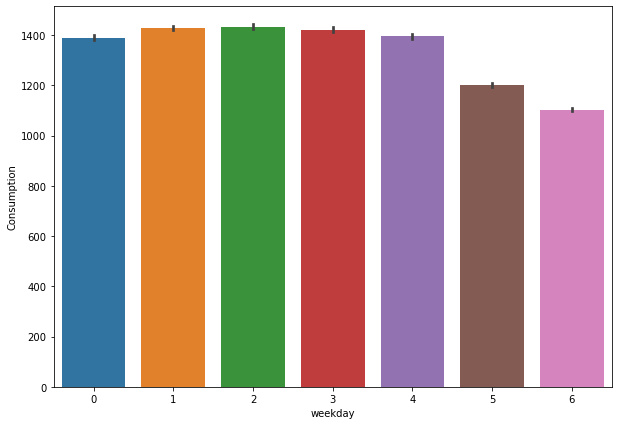

In [13]:
plt.figure(figsize=(10,7))

sns.barplot(x = 'weekday', y = 'Consumption', data=df)

## Preprocessing Scenario

In [14]:
cat_features = ['month', 'day', 'weekday']

transformer = ColumnTransformer(
    [
        ('onehot', OneHotEncoder(drop='first'), cat_features)
    ], remainder='passthrough'
)

## Data Splitting

In [15]:
X = df[['year', 'month', 'day', 'weekday']]
y = df['Consumption']

In [16]:
X_train = X[X['year'] < 2016]
X_test = X[X['year'] >= 2016]

y_train = y[X['year'] < 2016]
y_test = y[X['year'] >= 2016]

## Model

In [17]:
X_train_prep = transformer.fit_transform(X_train)
X_test_prep = transformer.transform(X_test)

In [18]:
model = LinearRegression()
model.fit(X_train_prep, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test_prep)

In [20]:
def evaluation(y_true, y_pred):
    mse = metrics.mean_squared_error(y_true, y_pred)
    msle = metrics.mean_squared_log_error(y_true, y_pred)
    rsq = metrics.r2_score(y_true, y_pred)

    print('mse', mse)
    print('msle', msle)
    print('rsq', rsq)

    plt.figure(figsize=(10,7))
    sns.scatterplot(x=y_pred, y=y_true-y_pred)

mse 7245.002653834577
msle 0.003906185228995843
rsq 0.7239124097401178


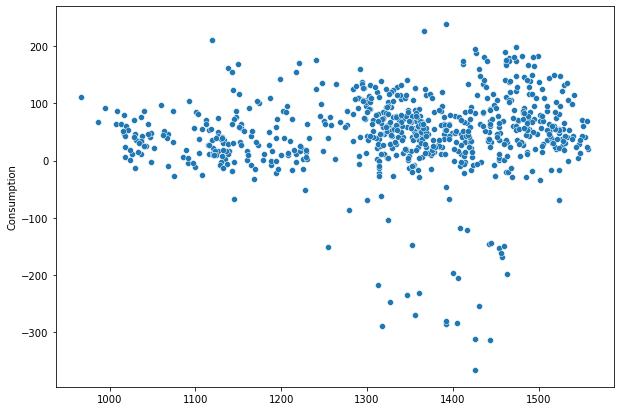

In [21]:
evaluation(y_test, y_pred)

# Feature Engineering 2

Continue Anlyze data opsd_germany_daily.csv
* linear regression + FE 2
* with FE date 2, try several models and find the best model based on R-squared in forward chaining strategy (5 splits)
* those models are: ridge, lasso, elastic net, SVR
* optimize the best model based on R-square using hyperparameter tuning
* check the final performance: explained varianaace, mean squared log error, r2, MAE, MSE, RMSE
* plot test data, FE Date 1 forecasting result, FE Date 2 forecasting result, FE Date 2 (Tuned Model) forecasting result

## Data Extraction

FE date 2: year, month, day, weekday, year 2009, yaer > 2014, chirstmas, winter

In [22]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar,year,month,day,weekday
0,2006-01-01,1069.184,NaN,NaN,NaN,2006,1,1,6
1,2006-01-02,1380.521,NaN,NaN,NaN,2006,1,2,0
2,2006-01-03,1442.533,NaN,NaN,NaN,2006,1,3,1
3,2006-01-04,1457.217,NaN,NaN,NaN,2006,1,4,2
4,2006-01-05,1477.131,NaN,NaN,NaN,2006,1,5,3


In [23]:
df['2009'] = np.where(df['year'] == 2009, 1, 0)
df['>=2014'] = np.where(df['year'] >= 2014, 1, 0)

christmas = ((df['month'] == 12)&(df['day'] >=25))|((df['month'] == 1)&(df['day'].isin([1,2,3])))
df['christmas'] = np.where(christmas,1,0)

winter = df['month'].isin([11,12,1,2])
df['winter'] = np.where(winter, 1, 0)

In [24]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar,year,month,day,weekday,2009,>=2014,christmas,winter
0,2006-01-01,1069.184,NaN,NaN,NaN,2006,1,1,6,0,0,1,1
1,2006-01-02,1380.521,NaN,NaN,NaN,2006,1,2,0,0,0,1,1
2,2006-01-03,1442.533,NaN,NaN,NaN,2006,1,3,1,0,0,1,1
3,2006-01-04,1457.217,NaN,NaN,NaN,2006,1,4,2,0,0,0,1
4,2006-01-05,1477.131,NaN,NaN,NaN,2006,1,5,3,0,0,0,1


## Data Splitting

In [25]:
X = df[['year', 'month', 'day', 'weekday', 'christmas', '2009', '>=2014', 'winter']]
y = df['Consumption']

In [26]:
X_train = X[X['year']<2016]
X_test = X[X['year']>=2016]
y_train = y[X['year']<2016]
y_test = y[X['year']>=2016]

## Preprocessing Scenario

In [27]:
cat_features = ['month', 'day', 'weekday']

transformer = ColumnTransformer(
    [
        ('onehot', OneHotEncoder(drop='first'), cat_features)
    ], remainder='passthrough'
)

## Evaluation

In [28]:
X_train_prep2 = transformer.fit_transform(X_train)
X_test_prep2 = transformer.transform(X_test)

In [29]:
model2 = LinearRegression()
model2.fit(X_train_prep2, y_train)
y_pred2 = model2.predict(X_test_prep2)

mse 7245.002653834577
msle 0.003906185228995843
rsq 0.7239124097401178


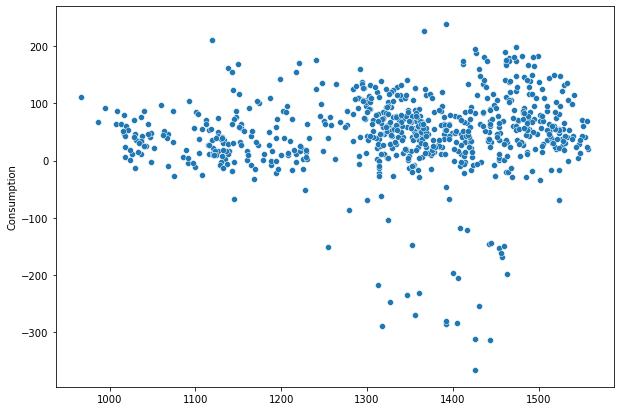

In [30]:
evaluation(y_test, y_pred)

mse 4328.974457337909
msle 0.00246771156126782
rsq 0.8350344115346278


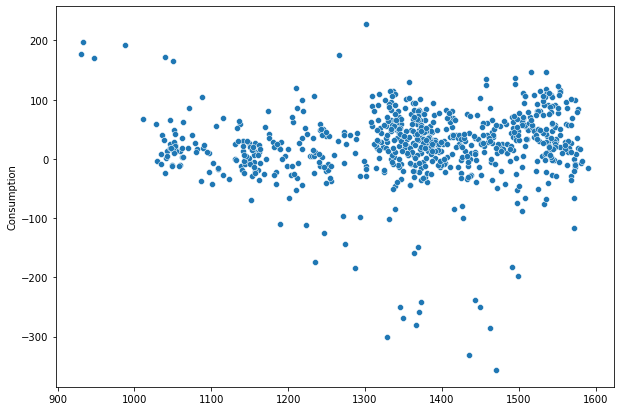

In [31]:
evaluation(y_test, y_pred2)

# Several Models Test

In [32]:
from sklearn.model_selection import TimeSeriesSplit, cross_val_score # 5 steps

from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [33]:
model = []
model.append(('ridge', Ridge()))
model.append(('lasso', Lasso()))
model.append(('elastic', ElasticNet()))
model.append(('regression', LinearRegression()))
model.append(('svr', SVR()))
model.append(('knn', KNeighborsRegressor()))

result = []
names = []

for name, model in model:

    tscv = TimeSeriesSplit(n_splits=5)

    pipe_model = Pipeline(
        [
            ('prep', transformer),
            ('model', model)
        ]
    )

    cv_result = cross_val_score(pipe_model, X_train, y_train, cv=tscv)
    result.append(cv_result)
    names.append(name)
    print(name, 'result')
    print('score', cv_result.mean())
    print('std', cv_result.std(), '\n')

ridge result
score 0.7652791435574036
std 0.06505623627567163 

lasso result
score 0.7640569343214245
std 0.0626135198405964 

elastic result
score 0.24214004087837004
std 0.07782651673307237 

regression result
score 0.7650085644772571
std 0.0636673107949372 

svr result
score -0.07340958404298736
std 0.06204670485663475 

knn result
score 0.6028804294288138
std 0.04771311303219176 



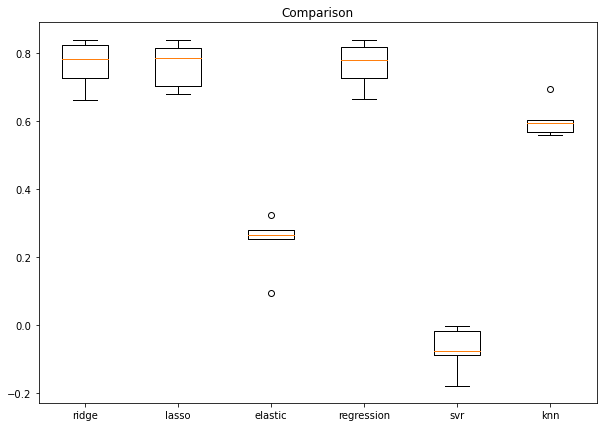

In [34]:
plt.figure(figsize=(10,7))

plt.boxplot(result, labels=names)

plt.title('Comparison')
plt.show()

## Ridge Optimization

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
model = Ridge()
pipe_model = Pipeline(
    [
        ('prep', transformer),
        ('model', model)
    ]
)

tscv = TimeSeriesSplit(n_splits=5)

param_search = {
    'model__alpha':[1000,100,10,1,0.1,0.01,0.001,0.0001]
}

gridcv = GridSearchCV(
    pipe_model,
    param_grid=param_search,
    cv=tscv,
    scoring='r2'
)

In [37]:
gridcv.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['month',
                                                                          'day',
                                                                          'weekday'])])),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [1000, 100, 10, 1, 0.1, 0.01, 0.001,
                                          0.0001]},
             scoring='r2')

In [38]:
print('best model', gridcv.best_params_)
print('best score', gridcv.best_score_)

best model {'model__alpha': 1}
best score 0.7652791435574036


In [39]:
y_pred3 = gridcv.best_estimator_.predict(X_test)

mse 4328.974457337909
msle 0.00246771156126782
rsq 0.8350344115346278


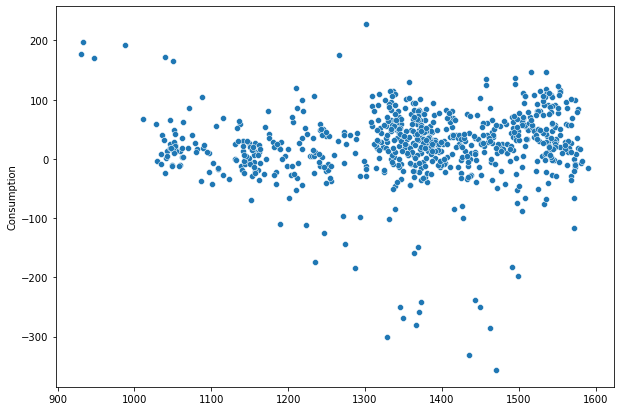

In [40]:
evaluation(y_test, y_pred2)

mse 4329.250942507272
msle 0.002461184938274637
rsq 0.835023875427493


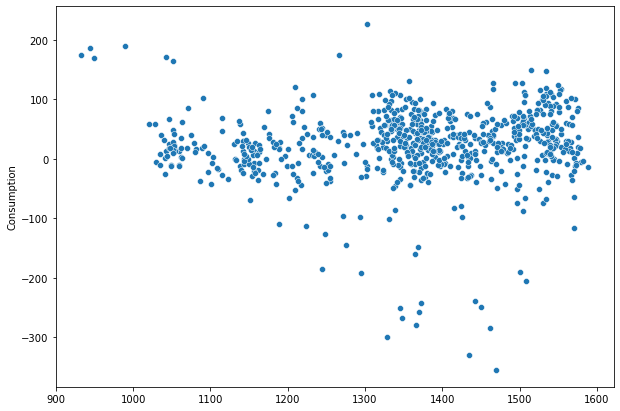

In [41]:
evaluation(y_test, y_pred3)

# Forecasting Result

In [42]:
df_test = X_test.copy()
df_test['Date'] = df[df['year']>=2016]['Date']
df_test['y true'] = y_test
df_test['linreg FE1'] = y_pred
df_test['linreg FE2'] = y_pred2
df_test['ridge FE2'] = y_pred3


In [43]:
df_test.head()

,year,month,day,weekday,christmas,2009,>=2014,winter,Date,y true,linreg FE1,linreg FE2,ridge FE2
3652,2016,1,1,4,1,0,1,1,2016-01-01,1060.366,1425.376346,1234.656796,1244.864831
3653,2016,1,2,5,1,0,1,1,2016-01-02,1192.698,1279.165369,1088.351167,1089.966842
3654,2016,1,3,6,1,0,1,1,2016-01-03,1179.282,1178.219063,987.335519,988.993817
3655,2016,1,4,0,0,0,1,1,2016-01-04,1456.294,1484.874610,1532.522636,1530.553625
3656,2016,1,5,1,0,0,1,1,2016-01-05,1506.737,1523.985162,1572.123501,1570.754176


In [44]:
go.Figure([go.Scatter(name='true', x=df_test['Date'], y=df_test['y true'])])
fig.add_trace(go.Scatter(name='linreg FE1', x=df_test['Date'], y=df_test['linreg FE1']))
fig.add_trace(go.Scatter(name='linreg FE2', x=df_test['Date'], y=df_test['linreg FE2']))
fig.add_trace(go.Scatter(name='ridge FE2', x=df_test['Date'], y=df_test['ridge FE2']))

fig.update_xaxes(rangeslider_visible=True)
fig.show()